# Agenda


- Part-I: Data visualization

  - Best practices and bad practices

  - Examples and resources

- Part-II: Matplotlib

  - Anatomy of a plot

  - Subplots

  - Bar charts and histograms

- Hands on experiments

# Part-I

[Reddit - Data is beatiful](https://www.reddit.com/r/dataisbeautiful/)

[Reddit - Data is Ugly](https://www.reddit.com/r/dataisugly/)



## Discussion


- [Data Storytelling Tips](https://visme.co/blog/data-storytelling-tips/) : Section: Examples of How to Improve Data Storytelling

# Part-II

## Matplotlib



In [2]:
# import matplotlib
import matplotlib.pyplot as plt



- There are two modes of matplotlib: 'pyplot' and 'object oriented'. Now we will work in the 'pyplot' mode.

- You can do more with object-oriented API but it requires more knowledge about the structure of the package. 

- On the other hand, pyplot API is very handy however it is not as flexible as object-oriented API.

- Creating a visualization is as simple as:

### Basic Plots

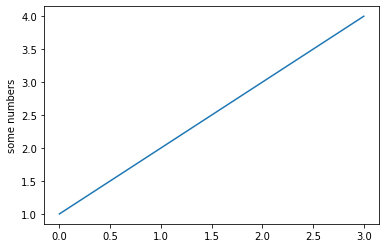

In [3]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

[Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

Changing styles

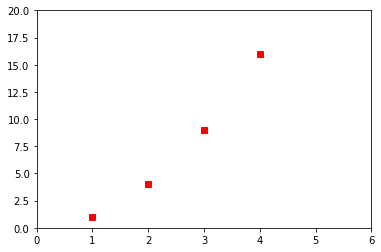

In [4]:
# plot o's with red color
# try squares and dashes also
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'rs')

# plt.axis(xmin, xmax, ymin, ymax)
plt.axis([0, 6, 0, 20])

plt.show()

- In addition to lists matplotlib can work with numpy arrays (in fact this is more practical and common.) 

- Also we can plot multiple lines into the same figure.

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


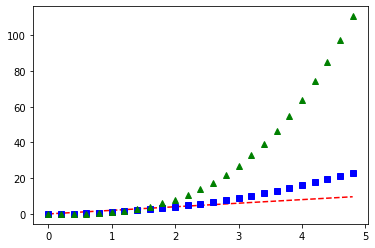

In [5]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
print(t)

# red dashes, blue squares and green triangles
plt.plot(t, 2*t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### Subplots

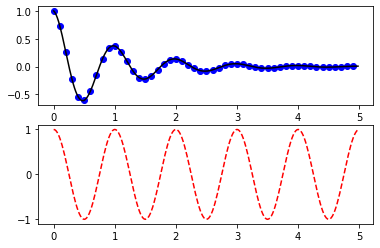

In [6]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


### Working with text

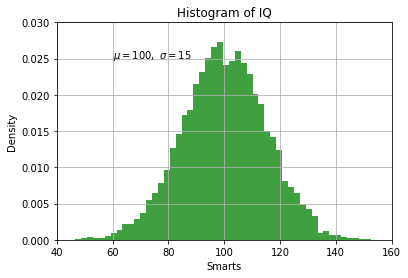

In [8]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Density')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### Bar plots and Histograms

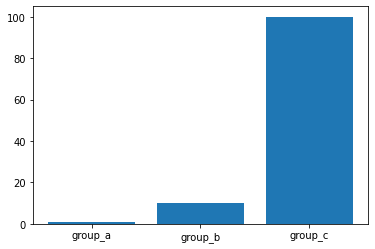

In [12]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]


plt.bar(names, values)
plt.draw()

[Source](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

 Other parameters:

 - `color`
 - `log` True
 - `align`: 'edge' and `witdh` = -0.5 vs 0.5


### Histograms


A histogram is an approximate representation of the distribution of numerical data. It was first introduced by Karl Pearson. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not required to be) of equal size.

(array([1.0000e+00, 4.0000e+00, 2.2000e+01, 1.1300e+02, 4.5300e+02,
        1.3630e+03, 3.5110e+03, 7.6010e+03, 1.2578e+04, 1.7476e+04,
        1.8849e+04, 1.6296e+04, 1.1238e+04, 6.3060e+03, 2.8020e+03,
        9.8700e+02, 3.1200e+02, 7.1000e+01, 1.2000e+01, 5.0000e+00]),
 array([-0.29113048,  0.21938264,  0.72989575,  1.24040887,  1.75092199,
         2.2614351 ,  2.77194822,  3.28246133,  3.79297445,  4.30348756,
         4.81400068,  5.32451379,  5.83502691,  6.34554002,  6.85605314,
         7.36656625,  7.87707937,  8.38759248,  8.8981056 ,  9.40861872,
         9.91913183]),
 <a list of 20 Patch objects>)

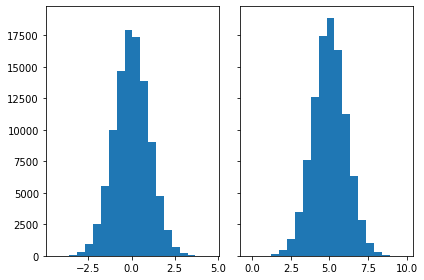

In [25]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

__Histogram - Extra__

In [1]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)
print(patches)
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

NameError: ignored

[Source](https://matplotlib.org/stable/gallery/statistics/hist.html)

### Box Plots

{'boxes': [<matplotlib.lines.Line2D at 0x7f71b183a150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f71b18401d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f71b17c8210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f71b1840c90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f71b183a710>,
  <matplotlib.lines.Line2D at 0x7f71b183ac50>]}

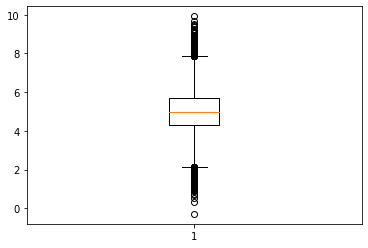

In [27]:
plt.boxplot(y)

Things to do:

- Explain Q1, Q3, IQR and outlier computations

- Mention drawbacks of boxplots -- distributions is not very clear. (mention violin plots?)

# Part-III

[Kaggle - NBA Players Data](https://www.kaggle.com/justinas/nba-players-data)

Download data and put it under 'content/' directory. 

Then unzip it by running the cell below.

In [28]:
!unzip /content/KaggleNBAPlayersData.zip

Archive:  /content/KaggleNBAPlayersData.zip
replace all_seasons.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [29]:
import pandas as pd

nba_players = pd.read_csv('/content/all_seasons.csv', index_col = 0)

## Scatter Plot 

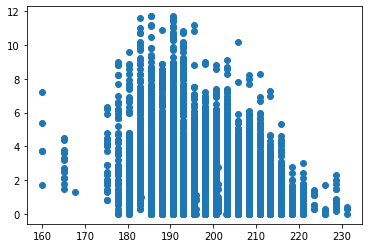

In [77]:
plt.scatter(nba_players.player_height, nba_players.ast)
# change x-label


# change y-label


# change title

plt.draw()

(array([2999., 3300., 2162., 1461.,  841.,  544.,  229.,  131.,   29.,
           4.]),
 array([ 0.  ,  3.61,  7.22, 10.83, 14.44, 18.05, 21.66, 25.27, 28.88,
        32.49, 36.1 ]),
 <a list of 10 Patch objects>)

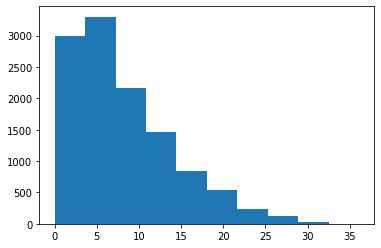

In [81]:
plt.hist(nba_players.pts)

{'boxes': [<matplotlib.lines.Line2D at 0x7f719c135f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f719c13fdd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f719c13be10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f719c13b8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f719c13f350>,
  <matplotlib.lines.Line2D at 0x7f719c13f890>]}

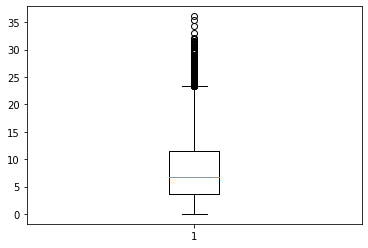

In [85]:
plt.boxplot(nba_players.pts)

In [88]:
# lets check outliers
nba_players[nba_players.pts >25].player_name.unique()

array(['Mitch Richmond', 'Michael Jordan', 'Karl Malone',
       "Shaquille O'Neal", 'Glen Rice', 'Allen Iverson', 'Vince Carter',
       'Grant Hill', 'Paul Pierce', 'Jerry Stackhouse', 'Kobe Bryant',
       'Chris Webber', 'Tracy McGrady', 'Tim Duncan', 'Dirk Nowitzki',
       'LeBron James', "Amar'e Stoudemire", 'Gilbert Arenas',
       'Dwyane Wade', 'Carmelo Anthony', 'Ray Allen', 'Michael Redd',
       'Kevin Durant', 'Danny Granger', 'Monta Ellis', 'Kevin Love',
       'James Harden', 'Russell Westbrook', 'Damian Lillard',
       'DeMarcus Cousins', 'Stephen Curry', 'Kawhi Leonard',
       'Karl-Anthony Towns', 'Kyrie Irving', 'DeMar DeRozan',
       'Anthony Davis', 'Isaiah Thomas', 'Giannis Antetokounmpo',
       'Paul George', 'Kemba Walker', 'Devin Booker', 'Bradley Beal',
       'Joel Embiid', 'Zach LaVine', 'Trae Young', 'Luka Doncic',
       'Zion Williamson', 'Donovan Mitchell', 'Jayson Tatum',
       "De'Aaron Fox", 'Nikola Jokic'], dtype=object)

In [44]:
nba_players.reb.value_counts()

2.0     302
1.8     279
1.9     273
2.3     267
1.5     257
       ... 
16.0      1
15.4      1
14.5      1
14.2      1
14.8      1
Name: reb, Length: 152, dtype: int64